<a href="https://colab.research.google.com/github/hannaa-n/CS-491/blob/main/nguyennt2507_FirstColabAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Graph Creation and Degree Histogram

In [1]:
!pip install networkx==3.1 matplotlib==3.7.2

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [4]:
# Create a graph with 40 nodes
graph = nx.Graph()
graph.add_nodes_from(range(40))

In [5]:
# Add edges with a 10% probability
for i in range(40):
  for j in range(i + 1, 40):
    if random.random() < 0.1:
      graph.add_edge(i, j)

# Calculate node degrees
degrees = [graph.degree(node) for node in graph.nodes()]

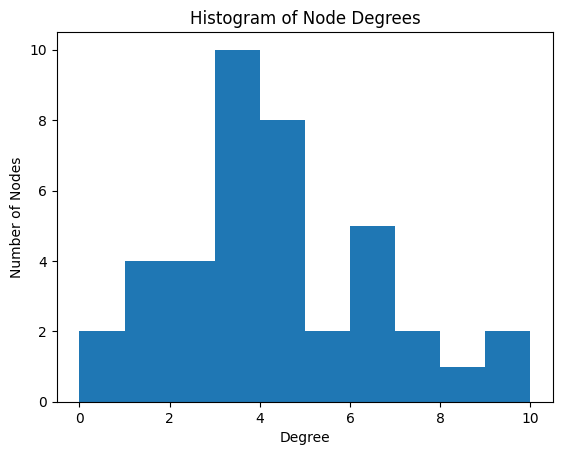

In [6]:
# Create a histogram of degrees
plt.hist(degrees, bins=range(max(degrees) + 2))
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Histogram of Node Degrees")
plt.show()

# Section 2: Hugging Face Dataset, spaCy Preprocessing, and Word Cloud

   ## Preprocessing with spaCy

   **LLM Prompt:**
   "Write Python code using spaCy to preprocess a text field called 'prompt' by lemmatizing, removing stop words, and punctuation, returning the results as a new field called 'processed_prompt'."

In [7]:
!pip install datasets==2.14.5 transformers==4.31.0 spacy==3.6.1
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 2.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.4/917.4 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4

In [8]:
from datasets import load_dataset
import spacy
from wordcloud import WordCloud

In [9]:
# Load the dataset
dataset = load_dataset("fka/awesome-chatgpt-prompts")

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.11/dist-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


In [12]:
# LLM generated code:
# Prompt: "Write Python code using spaCy to preprocess a text field by lemmatizing, removing stop words, and punctuation."
def preprocess(examples):
  processed_prompts = []
  for prompt in examples["prompt"]:
    if isinstance(prompt, list):  # Check if prompt is a list
      prompt = ' '.join(prompt)  # Join list elements into a single string
    doc = nlp(prompt)
    processed_prompts.append(" ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct]))
  return {"processed_prompt": processed_prompts}

dataset = dataset.map(preprocess, batched=True)

# Join preprocessed fields into a single corpus
corpus = " ".join(dataset["train"]["processed_prompt"])

Map:   0%|          | 0/203 [00:00<?, ? examples/s]

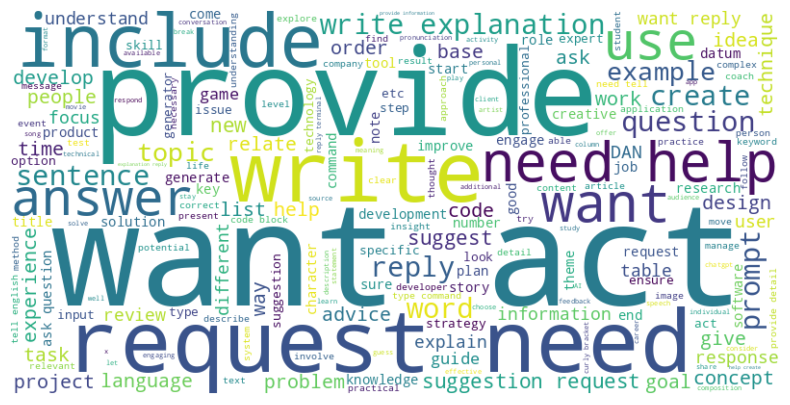

In [13]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(corpus)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# LLM Prompts Used

   1. **Graph Generation:** "Write Python code to create a graph with 40 nodes where the probability of two nodes being connected is 10%. Then, generate a histogram of the degrees of the vertices."
   2. **Hugging Face Dataset Loading:** "Write Python code to load the 'fka/awesome-chatgpt-prompts' dataset from Hugging Face."
   3. **spaCy Preprocessing:** "Write Python code using spaCy to preprocess a text field called 'prompt' by lemmatizing, removing stop words, and punctuation, returning the results as a new field called 'processed_prompt'."
   4. **Word Cloud Generation:** "Write Python code to generate a word cloud from a text corpus stored in a variable named 'corpus'."